In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi =  "indata/3pipesL"         #location of .inp file
fc = "indata/3pipesL"          #location of .config file
mtype = 1                      #model used along network edges. 1 for Preissman Slot. 0 for uniform
V0 =[]
Vf = []
Hbar = []
legs = []
lr = []

In [5]:
for i in range(4,8):
    fii = fi+"%d.inp"%i
    fci = fc+"%d.config"%i
    print fci
    n0 = PyNetwork(fii, fci, mtype)     #a network object
    T = n0.T
    M = n0.M
    dt = T/M
    print "T = %.2f M = %d , L = [%.f, %.f, %.f]"%(T,M, n0.Ls[0], n0.Ls[1], n0.Ls[2])
    V0.append(n0.getTotalVolume())
    n0.runForwardProblem(dt)
    Vf.append(n0.getTotalVolume())
    htmp = [n0.getAveGradH(i) for i in range(n0.M+1)]
    Hbar.append(htmp)
    #Hmax.append(max([n0.q]))
    lr.append(n0.Ls[2]/n0.Ls[1])
    legs.append("L1/L2 = %1.2f"%(n0.Ls[2]/n0.Ls[1]))


indata/3pipesL4.config
T = 18.00 M = 4200 , L = [100, 100, 125]
indata/3pipesL5.config
T = 18.00 M = 4200 , L = [100, 100, 150]
indata/3pipesL6.config
T = 18.00 M = 4200 , L = [100, 100, 175]
indata/3pipesL7.config
T = 18.00 M = 4200 , L = [100, 100, 200]


L1/L2 & mean (dH/dx) &  max(dH/dx) &  (V(0)-V(T))/V0\
\hline\
0.25    & 5.9364    &   47.5961 &  0.0016\\
0.50    & 6.4333    &   48.0428 &  0.0014\\
0.75    & 6.1457    &   39.5200 &  0.0013\\
1.00    & 6.2180    &   27.8705 &  0.0012\\
1.25    & 6.5103    &   46.0285 &  0.0011\\
1.50    & 6.4748    &   65.5993 &  0.0010\\
1.75    & 6.4360    &   65.7279 &  0.0009\\
2.00    & 6.4617    &   65.7167 &  0.0009\\


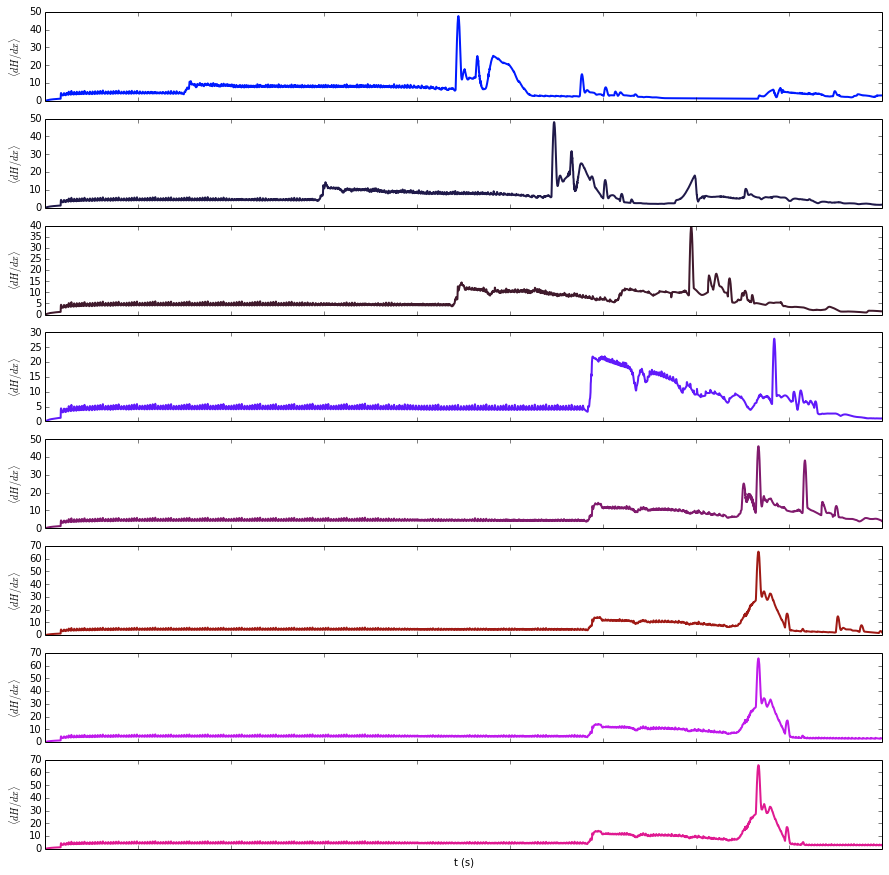

In [6]:
t = linspace(0,T,M+1);
Nh = len(legs)
print "L1/L2 & mean (dH/dx) &  max(dH/dx) &  (V(0)-V(T))/V0\\\n\hline\\"


fig,ax = plt.subplots(nrows = Nh, sharex=True,figsize=(15,15))

mx = max(max(Hbar))
for i in range(len(Hbar)):
    ax[i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    print "%1.2f    & %.4f    &   %.4f &  %.4f\\\\"%(lr[i], mean(Hbar[i]), max(Hbar[i]), (V0[i]-Vf[i])/V0[i])
    #ax[i].text(4,400,r"$L_1/L_2$=%1.2f"%lr[i])
    #ax[i].set_ylim([0,800])
    #ax[i].set_yticks([0,400,800])
    if i<Nh-1:
         ax[i].set_xticklabels([])
    ax[i].set_ylabel(r'$\langle dH/dx \rangle$')
ax[i].set_xlabel('t (s)')
#savefig("../../dhdxresults.eps", format='eps')
plt.show()
#plot(lr, [max(Hbar[i]) for i in range(len(Hbar))],'o')


In [7]:
print n0.a


[100.0, 100.0, 100.0]


In [8]:
print n0.Ls

[ 100.  100.  200.]


In [9]:
dx = n0.Ls[0]/n0.Ns[0]

In [10]:
dt/dx*n0.cmax[2]

0.85776016818322665

In [11]:
dt/dx*n0.a[0]

0.85714285714285721

In [12]:
n0.M

4200

In [13]:
dt/dx*n0.a[0]

0.85714285714285721

In [14]:

mm = max([mean(Hbar[i]) for i in range(Nh)])

In [15]:
print mm
print mx

6.51028337008
65.7167495604


In [16]:
0.25    & 9.5491e-04    &   1.4849e-02 &  0.0016\\
0.50    & 2.8327e-04    &   6.6836e-03 &  0.0014\\
0.75    & 1.2744e-04    &   6.8720e-03 &  0.0013\\
1.00    & 9.7234e-05    &   1.8817e-03 &  0.0012\\
1.25    & 1.0306e-04    &   5.7161e-03 &  0.0011\\
1.50    & 1.3225e-04    &   7.2537e-03 &  0.0010\\
1.75    & 1.2816e-04    &   7.2534e-03 &  0.0009\\
2.00    & 1.2602e-04    &   7.2522e-03 &  0.0009\\


SyntaxError: unexpected character after line continuation character (<ipython-input-16-de6774cae296>, line 1)

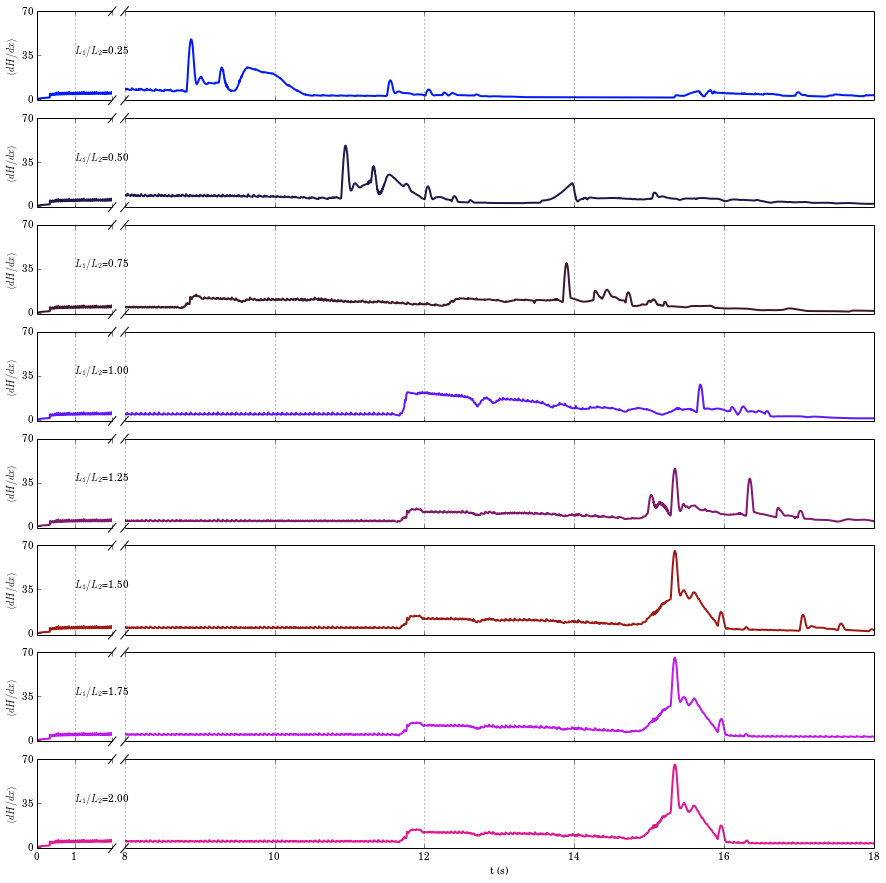

In [25]:
import matplotlib.gridspec as gridspec
rc('text', usetex=True)        #for tex rendering. 
rc('font', family='serif')     #for pretty font 

xlim  = [0., 1.0]
xlab = [0,1]
xlim2 = [8, T]
xlab2 = [8,10,12,14,16,18]
ylim = [-1,70]
yticks = [0,35,70]
xticks = [0,2]
xlimratio = (xlim[1]-xlim[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
xlim2ratio = (xlim2[1]-xlim2[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
gs = gridspec.GridSpec(len(Hbar), 2, width_ratios=[xlimratio, xlim2ratio])
fig = plt.figure(figsize=(15,15))
ax = []

for i in range(len(Hbar)):
    ax.append(fig.add_subplot(gs[2*i]))
    ax.append(fig.add_subplot(gs[2*i+1]))
    #erase the bits of bounding box you don't want
    ax[2*i].spines['right'].set_visible(False)
    ax[2*i+1].spines['left'].set_visible(False)

    ax[2*i].yaxis.tick_left()
    ax[2*i+1].set_yticks([])
    ax[2*i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    ax[2*i+1].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)

    ax[2*i+1].set_xlim(xlim2)
    ax[2*i].set_xlim(xlim)
    ax[2*i].set_ylabel(r'$\langle dH/dx \rangle$')  
    ax[2*i].set_xticklabels([])
    ax[2*i+1].set_xticklabels([])
    
    ax[2*i].set_ylim(ylim)
    ax[2*i+1].set_ylim(ylim)

    ax[2*i].set_yticks(yticks)
    ax[2*i].set_yticklabels(yticks)
    ax[2*i].set_xticks(xticks)

    ax[2*i].set_xticks([0,1,2])
   
    ax[2*i].text(1,ylim[1]/2,r"$L_1/L_2$=%1.2f"%lr[i])  #label the subplots
    
    #diagonal lines for split axes
    d = .05 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax[2*i].transAxes, color='k', clip_on=False)
    dx = d/(xlim[1]-xlim[0])
    dy = d
    ax[2*i].plot((1-dx,1+dx),(-dy,+dy), **kwargs)    # top-right diagonal
    ax[2*i].plot((1-dx,1+dx),(1-dy,1+dy), **kwargs) # bottom-right diagonal
    dx = d/(xlim2[1]-xlim2[0])
    kwargs.update(transform=ax[2*i+1].transAxes)  # switch to the bottom axes
    ax[2*i+1].plot((-dx,+dx),(-dy,+dy), **kwargs)      # top-left diagonal
    ax[2*i+1].plot((-dx,+dx),(1-dy,1+dy), **kwargs)    # bottom-left diagonal
    plt.subplots_adjust(wspace=0.03)
    #make vertical gridlines
    ax[2*i+1].xaxis.grid(True)
    ax[2*i].xaxis.grid(True)
ax[2*i].set_xticklabels(xlab)
ax[2*i+1].set_xticklabels(xlab2)
ax[2*i+1].set_xlabel('t (s)')
savefig("../../dhdxresultsprettynew.eps", format='eps')

In [ ]:
0.25    & 9.5491e-04    &   1.4849e-02 &  0.0016\\
0.50    & 2.8327e-04    &   6.6836e-03 &  0.0014\\
0.75    & 1.2744e-04    &   6.8720e-03 &  0.0013\\
1.00    & 9.7234e-05    &   1.8817e-03 &  0.0012\\
1.25    & 1.0306e-04    &   5.7161e-03 &  0.0011\\
1.50    & 1.3225e-04    &   7.2537e-03 &  0.0010\\
1.75    & 1.2816e-04    &   7.2534e-03 &  0.0009\\
2.00    & 1.2602e-04    &   7.2522e-03 &  0.0009\\


In [ ]:
import pickle
pickle.dump(Hbar, open( "../../example.p", "wb" ) )

In [30]:
y = pickle.load(open("../../example.p"))

[0.0,
 0.03660457307790188,
 0.0744613579539738,
 0.11018305010817553,
 0.14445217228673513,
 0.17836656034953768,
 0.2101416890097323,
 0.24098615582209504,
 0.271229866438073,
 0.2999569674171847,
 0.32853539308562807,
 0.35602121067702197,
 0.382403381879186,
 0.40843917505539573,
 0.4345951749899605,
 0.4599168590821032,
 0.4843551095004094,
 0.5088798581599341,
 0.5325953606303365,
 0.5563676181425243,
 0.5793340275526746,
 0.6016606074124643,
 0.6226804878530647,
 0.6421851617316736,
 0.6554195505927637,
 0.6737983830785977,
 0.6869761809717595,
 0.7042458756154433,
 0.7163769796816739,
 0.7329877610113393,
 0.7449846180763778,
 0.7616889387562689,
 0.7731291950247239,
 0.7891146275182053,
 0.8001347314354705,
 0.8155120497253328,
 0.8261641767714626,
 0.8410421603268524,
 0.8514039165944683,
 0.8649084210503891,
 0.8758187579046057,
 0.8882891563599069,
 0.8996879861698652,
 0.9114088822607582,
 0.9228488291253101,
 0.9338107491123366,
 0.945146347845794,
 0.9546182933119728,
 0